In [9]:
# !pydocstyle --match='(?!test_).*\.py(i)?' .
# !pydocstyle --match='(?!test_).*\.py(i)?' --add-ignore=D105,D107,  /workspaces/micropython-stubber/repos/micropython-stubs/publish/micropython-v1_21_0-esp32-stubs

# messages = !pydocstyle --match='(?!test_).*\.py(i)?' --add-ignore=D2,D4 --select=D100,D101,D102,D103,D104  /workspaces/micropython-stubber/repos/micropython-stubs/publish/micropython-v1_21_0-esp32-stubs
# print(messages[1:4])

In [10]:
from pathlib import Path


def count_def_class(folder_path: Path) -> dict:
    folder_path = Path(folder_path)
    if not folder_path.is_dir():
        raise ValueError(f"{folder_path} is not a directory")
    counts = {"def": 0, "class": 0, "module": 0}
    for file_path in folder_path.rglob("*"):
        if file_path.is_file() and file_path.suffix in [".pyi", ".py"]:
            counts["module"] += 1
            with file_path.open() as f:
                content = f.read()
                counts["def"] += content.count("def ")
                counts["class"] += content.count("class ")
    return counts

In [11]:
import pydocstyle


def count_missing_docstrings(folder_path: Path) -> dict:
    folder_path = Path(folder_path)
    if not folder_path.is_dir():
        raise ValueError(f"{folder_path} is not a directory")
    files = []
    for file_path in folder_path.rglob("*"):
        if file_path.is_file() and file_path.suffix in [".pyi", ".py"]:
            files.append(str(file_path))

    # parser = pydocstyle.config.ConfigurationParser()

    docstring_checks = "D100,D101,D102,D103,D104"
    try:
        errors = pydocstyle.check(files, select=docstring_checks)
        messages = list(f"{e.code} {e.definition} in {e.filename}" for e in errors)  # type: ignore
    except Exception as e:
        messages = []
    # print(messages[1:4])
    missing = {
        "module": len([m for m in messages if "D100" in m]),  # module or package
        "class": len([m for m in messages if "D101" in m]),  # class
        "def": len([m for m in messages if "D102" in m or "D103" in m]),  # method or function
    }
    return missing


# pth = Path("/workspaces/micropython-stubber/repos/micropython-stubs/publish/micropython-v1_21_0-esp32-stubs")
# missing = count_missing_docstrings(pth)
# print(missing)

In [12]:
def split_folder_name(folder_name: str) -> tuple:
    # micropython-latest-stm32-PYBV11-merged
    parts = folder_name.split("-")
    version = parts[1]
    port = parts[2]
    board = parts[3]
    return version, port, board


def get_docstring_score(folder_path: Path, stub_type) -> dict:
    defs = count_def_class(folder_path)
    missing = count_missing_docstrings(folder_path)
    version, port, board = split_folder_name(folder_path.name)
    docstring_score = {
        "version": version,
        "port": port,
        "board": board,
        "stub_type": stub_type,
        "module": round(1 - (missing["module"] + 1) / (defs["module"] + 1), 2),
        "class": round(1 - (missing["class"] + 1) / (defs["class"] + 1), 2),
        "def": round(1 - (missing["def"] + 1) / (defs["def"] + 1), 2),
    }
    return docstring_score


scores = []

In [13]:
publish_path = Path("/workspaces/micropython-stubber/repos/micropython-stubs/stubs")

for folder_path in publish_path.glob("micropython-latest*-merged"):
    docstring_score = get_docstring_score(folder_path, "mmerged")
    scores.append(docstring_score)
    print(f"{folder_path.name} {docstring_score}")

micropython-latest-stm32-PYBV11-merged {'version': 'latest', 'port': 'stm32', 'board': 'PYBV11', 'stub_type': 'mmerged', 'module': 0.87, 'class': 0.87, 'def': 0.63}
micropython-latest-rp2-merged {'version': 'latest', 'port': 'rp2', 'board': 'merged', 'stub_type': 'mmerged', 'module': 0.9, 'class': 0.79, 'def': 0.57}
micropython-latest-samd-ADAFRUIT_FEATHER_M4_EXPRESS-merged {'version': 'latest', 'port': 'samd', 'board': 'ADAFRUIT_FEATHER_M4_EXPRESS', 'stub_type': 'mmerged', 'module': 0.87, 'class': 0.84, 'def': 0.56}
micropython-latest-rp2-RPI_PICO-merged {'version': 'latest', 'port': 'rp2', 'board': 'RPI_PICO', 'stub_type': 'mmerged', 'module': 0.87, 'class': 0.8, 'def': 0.57}
micropython-latest-esp32-ESP32_GENERIC-merged {'version': 'latest', 'port': 'esp32', 'board': 'ESP32_GENERIC', 'stub_type': 'mmerged', 'module': 0.82, 'class': 0.71, 'def': 0.58}
micropython-latest-samd-ADAFRUIT_ITSYBITSY_M4_EXPRESS-merged {'version': 'latest', 'port': 'samd', 'board': 'ADAFRUIT_ITSYBITSY_M4_EXP

In [14]:
publish_path = Path("/workspaces/micropython-stubber/repos/micropython-stubs/publish")

for folder_path in publish_path.glob("micropython-v*"):
    docstring_score = get_docstring_score(folder_path, "package")
    scores.append(docstring_score)
    print(f"{folder_path.name} {docstring_score}")

micropython-v1_20_0-esp32-stubs {'version': 'v1_20_0', 'port': 'esp32', 'board': 'stubs', 'stub_type': 'package', 'module': 0.64, 'class': 0.65, 'def': 0.61}
micropython-v1_20_0-samd-adafruit_itsybitsy_m4_express-stubs {'version': 'v1_20_0', 'port': 'samd', 'board': 'adafruit_itsybitsy_m4_express', 'stub_type': 'package', 'module': 0.75, 'class': 0.69, 'def': 0.57}
micropython-v1_21_0-stm32-stubs {'version': 'v1_21_0', 'port': 'stm32', 'board': 'stubs', 'stub_type': 'package', 'module': 0.75, 'class': 0.7, 'def': 0.65}
micropython-v1_20_0-rp2-pico-stubs {'version': 'v1_20_0', 'port': 'rp2', 'board': 'pico', 'stub_type': 'package', 'module': 0.79, 'class': 0.7, 'def': 0.61}
micropython-v1_20_0-stm32-stubs {'version': 'v1_20_0', 'port': 'stm32', 'board': 'stubs', 'stub_type': 'package', 'module': 0.77, 'class': 0.75, 'def': 0.66}
micropython-v1_21_0-samd-seeed_wio_terminal-stubs {'version': 'v1_21_0', 'port': 'samd', 'board': 'seeed_wio_terminal', 'stub_type': 'package', 'module': 0.7, '

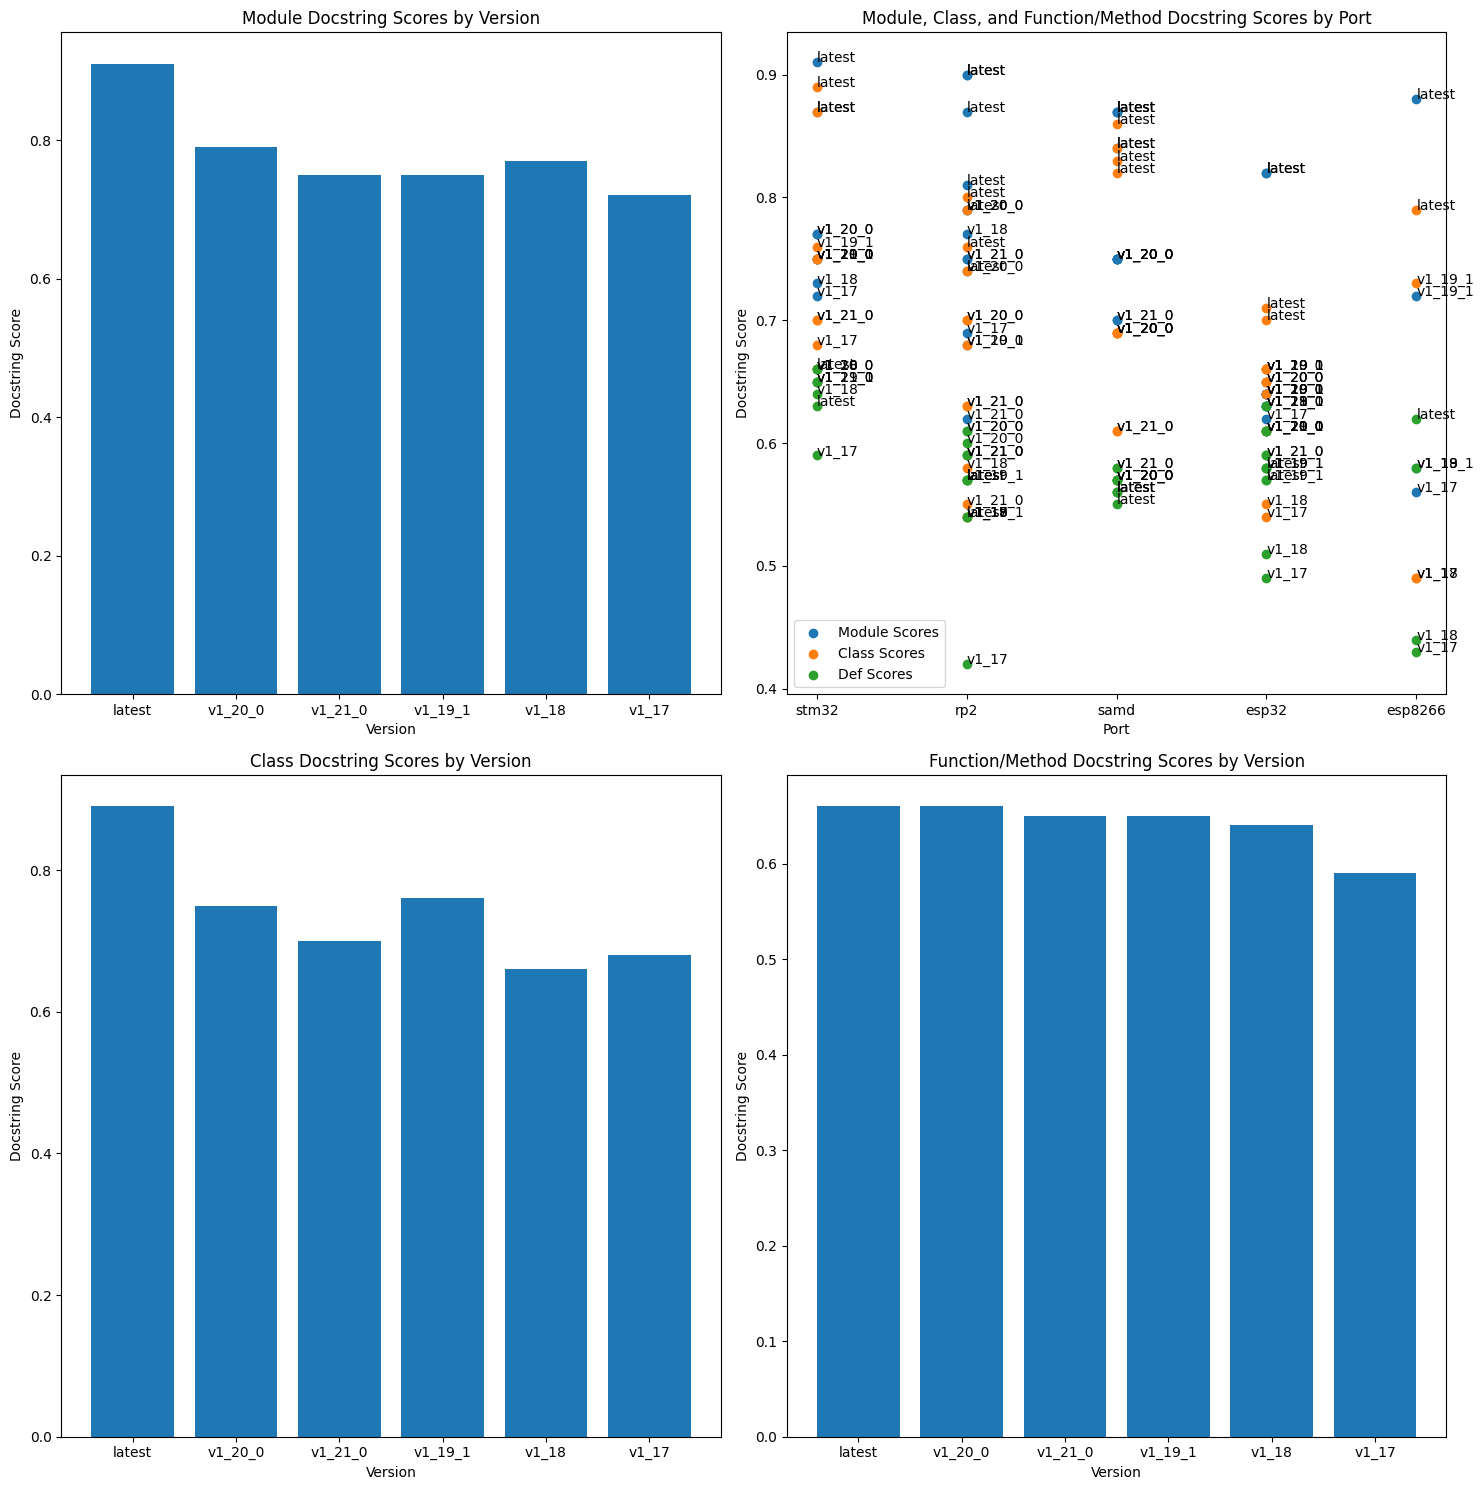

In [30]:
import matplotlib.pyplot as plt

# extract the version and module scores from the scores list
versions = [score["version"] for score in scores]
module_scores = [score["module"] for score in scores]
class_scores = [score["class"] for score in scores]
def_scores = [score["def"] for score in scores]
ports = [score["port"] for score in scores]

# create a figure with 5 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

# plot the module scores on the first subplot
ax1.bar(versions, module_scores)
ax1.set_title("Module Docstring Scores by Version")
ax1.set_xlabel("Version")
ax1.set_ylabel("Docstring Score")


# plot the class scores on the second subplot
ax3.bar(versions, class_scores)
ax3.set_title("Class Docstring Scores by Version")
ax3.set_xlabel("Version")
ax3.set_ylabel("Docstring Score")

# plot the def scores on the third subplot
ax4.bar(versions, def_scores)
ax4.set_title("Function/Method Docstring Scores by Version")
ax4.set_xlabel("Version")
ax4.set_ylabel("Docstring Score")

# plot the scatter chart on the fourth subplot
ax2.scatter(ports, module_scores)
ax2.scatter(ports, class_scores)  # add class scores to the scatter plot
ax2.scatter(ports, def_scores)  # add def scores to the scatter plot
ax2.set_title("Module, Class, and Function/Method Docstring Scores by Port")
ax2.set_xlabel("Port")
ax2.set_ylabel("Docstring Score")

# add labels to the datapoints in the scatterplot
for i, port in enumerate(ports):
    ax2.annotate(versions[i], (port, module_scores[i]))
    ax2.annotate(versions[i], (port, class_scores[i]))  # add version label to class scores
    ax2.annotate(versions[i], (port, def_scores[i]))  # add version label to def scores

# add legend to the scatter plot
ax2.legend(["Module Scores", "Class Scores", "Def Scores"])

# adjust the layout and display the plot
plt.tight_layout()
plt.show()
